<h2>Drug Shortages: An Overview</h2>
<p><b>Hannah Payunk</b><br />  
    <b>7 May 2025</b><br />  
    <b>CHIP 690.335</b></p>

---

Throughout recent years, the US has experienced increasing demands on its pharmaceutical system. These increased demands result in widespread drug shortages, oftentimes for years and even decades. The most common reasons include increased demand for certain drugs (especially seen with ADHD medications), delays in receiving raw materials from suppliers, and manufacturing quality issues. Below lists the most commonly cited shortage reasons for drugs currently on shortage in the US.

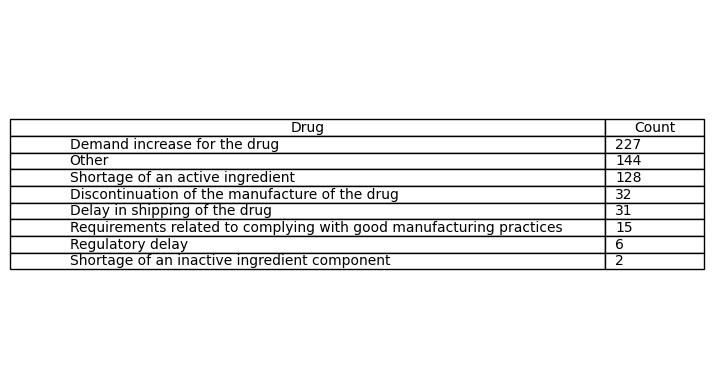

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

""" File names """
url_dataset = "https://api.fda.gov/drug/shortages.json"

response = requests.get(f'{url_dataset}?count=shortage_reason.exact&limit=10').json()
results = response["results"]
df5 = pd.DataFrame(results)

plt.axis('off')
plt.table(cellText=df5.values, loc='center', colWidths=[1.2, 0.2], cellLoc='left', colLabels=["Drug", "Count"])

plt.show()

---

As drugs are added to the shortage list, they may become available, unavailable, or have limited availability. The manufacturers with the most drugs currently on shortage are listed below, categorized by the current availability of those drugs. Keep in mind some manufacturers, like Hospira, are subsidiaries of larger companies (Pfizer).

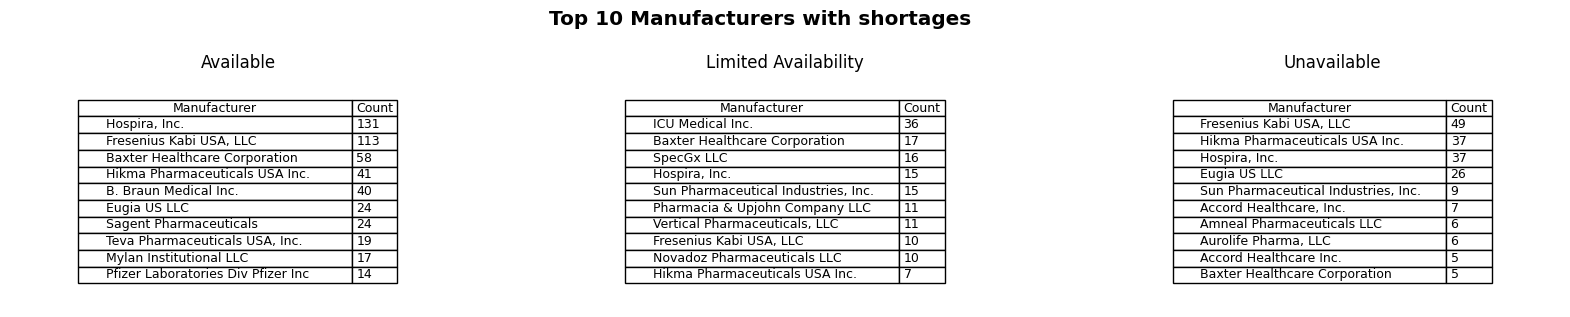

In [2]:
response = requests.get(f'{url_dataset}?search=availability:"Available"&count=openfda.manufacturer_name.exact&limit=10').json()
results = response["results"]
df1 = pd.DataFrame(results)

response2 = requests.get(f'{url_dataset}?search=availability:"Limited Availability"&count=openfda.manufacturer_name.exact&limit=10').json()
results = response2["results"]
df2 = pd.DataFrame(results)

response3 = requests.get(f'{url_dataset}?search=availability:"Unavailable"&count=openfda.manufacturer_name.exact&limit=10').json()
results = response3["results"]
df3 = pd.DataFrame(results)

fig, axs = plt.subplots(1, 3, figsize=(20,3))
plt.suptitle("Top 10 Manufacturers with shortages", fontweight='bold', fontsize='x-large', y=1.1)

axs[0].axis('off')
axs[0].table(cellText=df1.values, loc='center', colWidths=[0.6, 0.1], cellLoc='left', colLabels=["Manufacturer", "Count"])
axs[0].set_title("Available")

axs[1].axis('off')
axs[1].table(cellText=df2.values, loc='center', colWidths=[0.6, 0.1], cellLoc='left', colLabels=["Manufacturer", "Count"])
axs[1].set_title("Limited Availability")

axs[2].axis('off')
axs[2].table(cellText=df3.values, loc='center', colWidths=[0.6, 0.1], cellLoc='left', colLabels=["Manufacturer", "Count"])
axs[2].set_title("Unavailable")

plt.show()

---

Historically, injectables make up the largest portion of drugs currently on shortage. With manufacturing quality problems often making up a large portion of reasons for drug shortages, sterile injectables are often disproportionally affected. The next highest categories are tablets and capsules, but both are represented significantly less than injectables considering they are the two primary drug routes for prescription drugs sent home with patients.

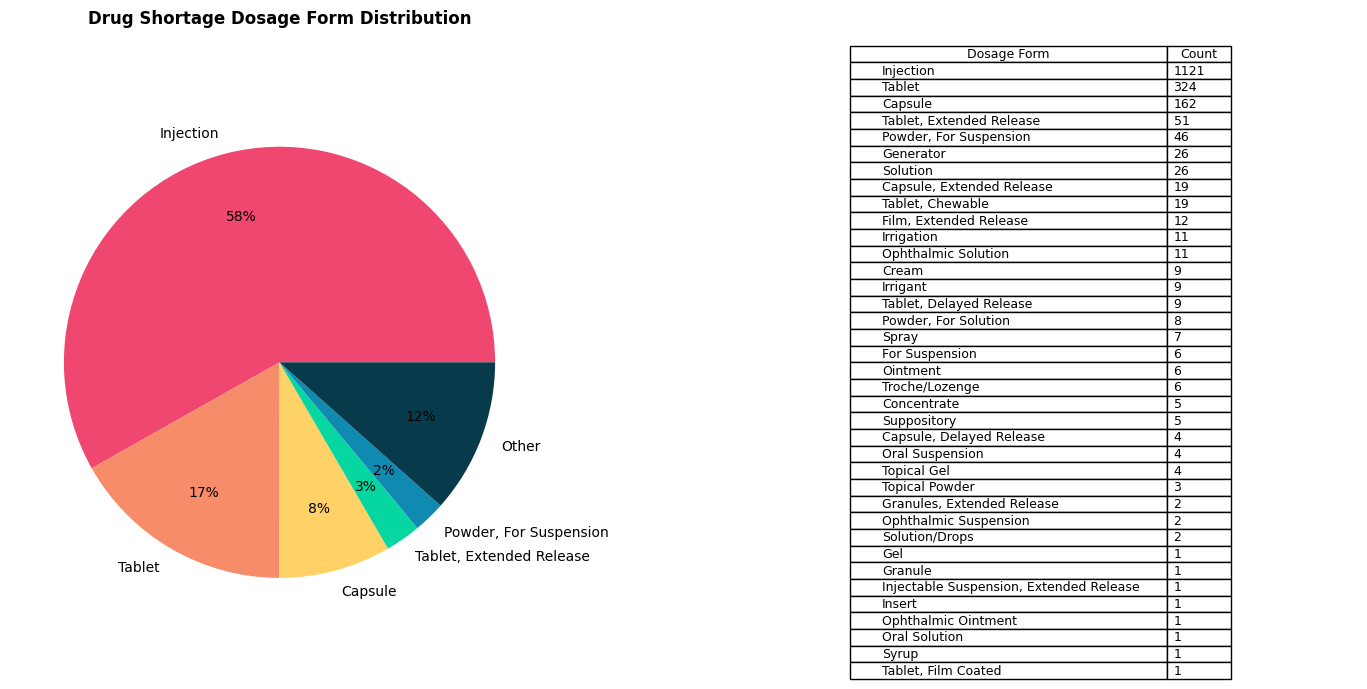

In [3]:
response = requests.get(f"{url_dataset}?count=dosage_form.exact").json()
results = response["results"]
df = pd.DataFrame(results)
"""print(df)"""
df2 = df[:5].copy()
new_row = pd.DataFrame(data={"term" : ["Other"], "count" : [df["count"][5:].sum()]})

df2 = pd.concat([df2, new_row])

fig, axs = plt.subplots(1, 2, figsize=(18,7))
axs[0].pie(df2["count"], labels=df2["term"], autopct="%1.0f%%", pctdistance=0.7, radius=1, colors=["#ef476f", "#f78c6b", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"])
axs[0].set_title("Drug Shortage Dosage Form Distribution", pad=50, fontweight='bold')

axs[1].axis('tight')
axs[1].axis('off')
axs[1].table(cellText=df.values, loc='center', colWidths=[0.5, 0.1], cellLoc='left', colLabels=["Dosage Form", "Count"])

""" df2.plot(kind="pie", y="count", labels=df2["term"], autopct="%1.0f%%")"""
plt.show()

---

When investigating the most common injectable drugs on shortage, it is no surprise that neuraxial medications make up the bulk of the list. Anesthesiologists are most notably affected by this since induction agents (dexmedetomidine, midazolam), local anesthetics (bupivicaine, lidocaine, ropivacaine), and analgesics (hydromorphone) taking up the bulk of the shortage list. 

In [ ]:
response = requests.get(f'{url_dataset}?search=dosage_form.exact:"Injection"&count=generic_name.exact&limit=10').json()
results = response["results"]
df3 = pd.DataFrame(results)

response2 = requests.get(f'{url_dataset}?search=dosage_form.exact:"Injection"&count=therapeutic_category&limit=10').json()
results = response2["results"]
df4 = pd.DataFrame(results)

fig, axs = plt.subplots(1, 2, figsize=(18,3))
plt.suptitle("Injectable drug shortages", fontweight='bold', fontsize='x-large', y=1.1)

axs[0].axis('off')
axs[0].table(cellText=df3.values, loc='center', colWidths=[0.5, 0.1], cellLoc='left', colLabels=["Drug", "Count"])
axs[0].set_title("Most common injectable drugs")

axs[1].barh(df4['term'], df4['count'], color="#ef476f")
axs[1].set_title("Most commonly affected medical fields")
axs[1].set_xlabel("Number of Drugs")

plt.show()

<p>Sources:</p>
<p>Center for Drug Evaluation and Research. “Frequently Asked Questions about Drug Shortages.” U.S. Food and Drug Administration, FDA, www.fda.gov/drugs/drug-shortages/frequently-asked-questions-about-drug-shortages.</p>
<p>Marta Wosińska, Richard G. Frank, et al. “Drug Shortages: A Guide to Policy Solutions.” Brookings, 19 Sept. 2024, www.brookings.edu/articles/drug-shortages-a-guide-to-policy-solutions/. </p>
<p>“Statement on Neuraxial Medication Shortage and Alternatives.” American Society of Anesthesiologists (ASA), www.asahq.org/standards-and-practice-parameters/statement-on-neuraxial-medication-shortage-and-alternatives.</p>
<p>Ventola CL. The drug shortage crisis in the United States: causes, impact, and management strategies. P T. 2011 Nov;36(11):740-57. PMID: 22346307; PMCID: PMC3278171.</p>